In [1]:
from image_adjust import load_det_model, random_blur, systematic_blur, object_blur, non_semantic_transform, color_jitter, scale, rotate
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

/home/fieldaj1/.local/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
det_model = load_det_model()

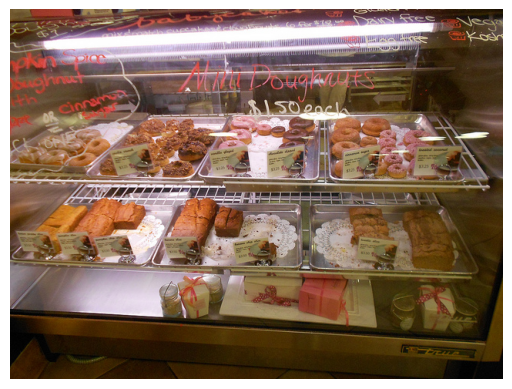

In [3]:
img_path = '/home/fieldaj1/thesis/data/VQA2.0/img/COCO_train2014_000000579374.jpg'
og_img = cv2.imread(img_path)
image_rgb = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [4]:
tfs = non_semantic_transform(image_rgb)

In [5]:
def pic_grid(imgs):
    fig, axes = plt.subplots(5, 5, figsize=(8, 8))
    for ax, img in zip(axes.flat, imgs):
        ax.imshow(img)
        ax.axis('off')
    sns.despine(left=True, bottom=True)
    plt.show()

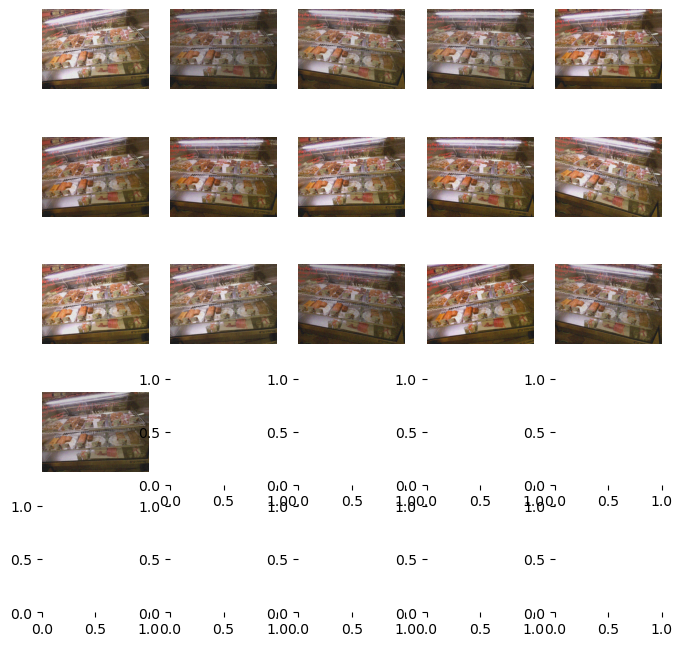

In [6]:
pic_grid(tfs)

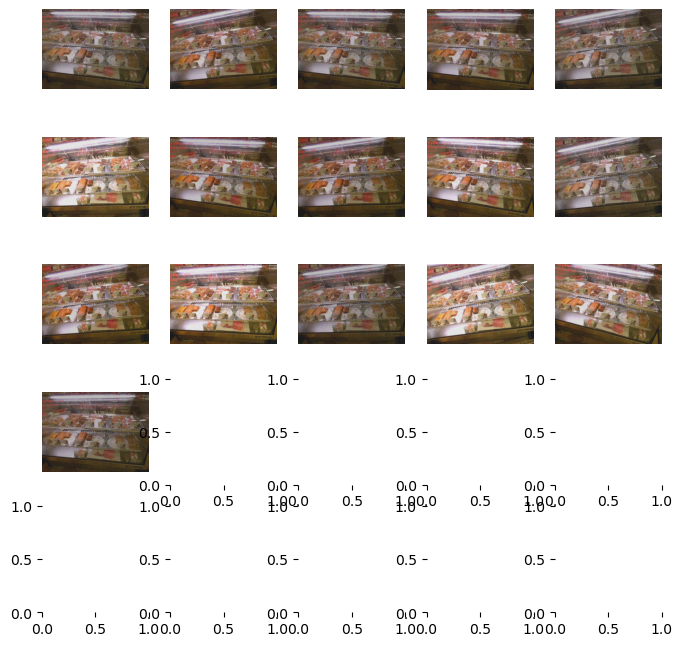

In [7]:
scale_range = (0.8, 1.2)
rotation = 15

tfs_2 = []
for _ in range(16):
    cpy = image_rgb.copy()

    # color jitter
    brightness = random.uniform(scale_range[0], scale_range[1])
    contrast = random.uniform(scale_range[0], scale_range[1])
    saturation = random.uniform(scale_range[0], scale_range[1])
    cpy = color_jitter(cpy, brightness, contrast, saturation)

    # rotation
    angle = random.uniform(-rotation, rotation)
    cpy = rotate(cpy, angle)

    # scaling
    scale_factor = random.uniform(scale_range[0], scale_range[1])
    cpy = scale(cpy, scale_factor)

    # noise
    noise = np.random.randint(0, 256, (cpy.shape[0], cpy.shape[1], 3), dtype=np.uint8)
    overlay = 0.2 * noise + 0.8 * cpy
    cpy = np.clip(overlay, 0, 255).astype(np.uint8)

    tfs_2.append(cpy)

pic_grid(tfs_2)